## Import Needed Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from geopy.geocoders import Nominatim
import folium

## Read in Shotspotter Data

In [2]:
df_chi = pd.read_csv('shotSpotterDataChicago.csv')
print(type(df_chi))
print(df_chi.columns)
df_chi.head()

<class 'pandas.core.frame.DataFrame'>
Index(['EventDate', 'EventType', 'Location', 'YCoord', 'XCoord', 'Y', 'X',
       'day', 'month', 'year', 'yearmonth'],
      dtype='object')


,EventDate,EventType,Location,YCoord,XCoord,Y,X,day,month,year,yearmonth
0,01/01/2018 00:19:51,SST,26XX W 24TH,NaN,NaN,NaN,NaN,1,1,2018,217
1,01/01/2018 00:24:46,SST,41XX S ROCKWELL ST,41819148.0,-87689632.0,41.819149,-87.689629,1,1,2018,217
2,01/01/2018 00:28:27,SST,24XX S MILLARD,NaN,NaN,NaN,NaN,1,1,2018,217
3,01/01/2018 00:30:02,SST,51XX S PAULINA,NaN,NaN,NaN,NaN,1,1,2018,217
4,01/01/2018 00:30:19,SST,24XX S KARLOV,NaN,NaN,NaN,NaN,1,1,2018,217


In [3]:
df_mia = pd.read_csv('shotSpotterDataMiami.csv')
print(type(df_mia))
print(df_mia.columns)
df_mia.head()

<class 'pandas.core.frame.DataFrame'>
Index(['Complaint Datetime', 'Case Number', 'Signal Suffix',
       'CAD Signal Code Description', 'Grid Code', 'Address String',
       'Latitude', 'Longitude', 'City', 'State', 'year', 'month', 'yearmonth'],
      dtype='object')


,Complaint Datetime,Case Number,Signal Suffix,CAD Signal Code Description,Grid Code,Address String,Latitude,Longitude,City,State,year,month,yearmonth
0,3/1/2012 21:19,PD120301082166,14,CONDUCT INVESTIGATION,862,2333 NW 64TH ST,25.833496,-80.236035,Miami Dade County,FL,2012,3,147
1,3/2/2012 19:28,PD120302083498,14,CONDUCT INVESTIGATION,918,2505 NW 61ST ST,25.830526,-80.239260,Miami Dade County,FL,2012,3,147
2,3/3/2012 21:20,PD120303084889,14,CONDUCT INVESTIGATION,862,2568 NW 65TH ST,25.833523,-80.239895,Miami Dade County,FL,2012,3,147
3,3/4/2012 18:02,PD120304086058,14,CONDUCT INVESTIGATION,863,2167 NW 64TH ST,25.833581,-80.232813,Miami Dade County,FL,2012,3,147
4,3/4/2012 19:57,PD120304086208,14,CONDUCT INVESTIGATION,863,6947 NW 21ST AVE,25.837865,-80.231173,Miami Dade County,FL,2012,3,147


## Chicago and Miami_Dade County Have Similar Populations: ~2.7M 

In [6]:
df_chi.shape

(21192, 11)

In [7]:
df_mia.shape

(3036, 13)

In [22]:
oneYear_chi_df = df_chi[df_chi.year == '2018']

[Text(0.5, 1.0, 'Bar Chart of Counts of Shooting Incidents in Chicago in 2018')]

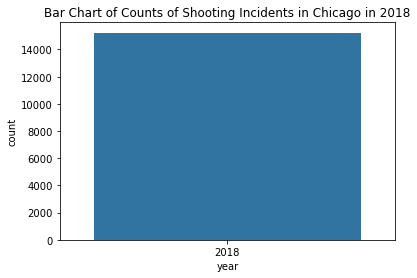

In [17]:
sns.countplot(x=oneYear_chi_df['year']).set(title="Bar Chart of Counts of Shooting Incidents in Chicago in 2018")

In [23]:
oneYear_mia_df = df_mia[df_mia.year == '2012']

In [24]:
sns.countplot(x=oneYear_mia_df['year']).set(title="Bar Chart of Counts of Shooting Incidents in Miami")

ValueError: min() arg is an empty sequence

In [25]:
# Creates a Map Centered around Chicago
chi_shooting_map = folium.Map(location=(41.8781, -87.6298), zoom_start=10)

# Add a marker for every incident ocurring in Jan 2018
count = 0
for index,row in df_chi.iterrows():
  if ("2018" in row['year'] and "1" in row['month']):
      count+=1
      folium.Marker(location=(row['Y'], 
                              row['X']), 
                    popup=row['EventDate']).add_to(chi_shooting_map)

print(count)
display(chi_shooting_map)


3845


In [26]:
# Creates a Map Centered around Chicago
mia_shooting_map = folium.Map(location=(41.8781, -87.6298), zoom_start=10)

# Add a marker for every incident ocurring in Jan 2018
for index,row in df_mia.iterrows():
  if ("2018" in row['year'] and "1" in row['month']):
      folium.Marker(location=(row['Latitude'], 
                              row['Longitude']), 
                    popup=row['Complaint Datetime']).add_to(mia_shooting_map)
        
display(mia_shooting_map)

TypeError: argument of type 'int' is not iterable

## While Chicago and Miami have similar populations, the Shotspotter data suggests that there are around 7 times more gunshot incidents in Chicago 